# Workflow
* Understanding the Data
* EDA
* Data-Preprocessing
* Distribution of Customer Recency
* Visualize Recency & Frequency vs Monetary
* Customer segmenation using K-means
* Elbow (choose Clustering)
* Calculation of Silhoutte
* Interpretation using K clusters

In [507]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import  silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

Collect data and Import data

In [509]:
sales_data = pd.read_excel('AdventureWorksSales.xlsx', sheet_name='Sales_data')
customer_data = pd.read_excel('AdventureWorksSales.xlsx', sheet_name='Customer_data')


In [510]:
sales_data

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,6074.982,0,1898.0944,5694.2832,6074.982
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121248,75122001,-1,15868,485,20200615,20200625,NaN,6,1,21.980,21.980,0,8.2205,8.2205,21.980
121249,75122002,-1,15868,225,20200615,20200625,NaN,6,1,8.990,8.990,0,6.9223,6.9223,8.990
121250,75123001,-1,18759,485,20200615,20200625,NaN,6,1,21.980,21.980,0,8.2205,8.2205,21.980
121251,75123002,-1,18759,486,20200615,20200625,NaN,6,1,159.000,159.000,0,59.4660,59.4660,159.000


In [511]:
sales_data.shape

(121253, 15)

In [512]:
sales_data.columns

Index(['SalesOrderLineKey', 'ResellerKey', 'CustomerKey', 'ProductKey',
       'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'SalesTerritoryKey',
       'Order Quantity', 'Unit Price', 'Extended Amount',
       'Unit Price Discount Pct', 'Product Standard Cost',
       'Total Product Cost', 'Sales Amount'],
      dtype='object')

In [513]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SalesOrderLineKey        121253 non-null  int64  
 1   ResellerKey              121253 non-null  int64  
 2   CustomerKey              121253 non-null  int64  
 3   ProductKey               121253 non-null  int64  
 4   OrderDateKey             121253 non-null  int64  
 5   DueDateKey               121253 non-null  int64  
 6   ShipDateKey              119140 non-null  float64
 7   SalesTerritoryKey        121253 non-null  int64  
 8   Order Quantity           121253 non-null  int64  
 9   Unit Price               121253 non-null  float64
 10  Extended Amount          121253 non-null  float64
 11  Unit Price Discount Pct  121253 non-null  int64  
 12  Product Standard Cost    121253 non-null  float64
 13  Total Product Cost       121253 non-null  float64
 14  Sale

In [514]:
sales_data.isnull().sum()

SalesOrderLineKey             0
ResellerKey                   0
CustomerKey                   0
ProductKey                    0
OrderDateKey                  0
DueDateKey                    0
ShipDateKey                2113
SalesTerritoryKey             0
Order Quantity                0
Unit Price                    0
Extended Amount               0
Unit Price Discount Pct       0
Product Standard Cost         0
Total Product Cost            0
Sales Amount                  0
dtype: int64

In [515]:
sales_data[['SalesOrderLineKey','ResellerKey','CustomerKey','ProductKey','OrderDateKey','DueDateKey','ShipDateKey','SalesTerritoryKey']].describe()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey
count,1.212530e+05,121253.000000,121253.000000,121253.000000,1.212530e+05,1.212530e+05,1.191400e+05,121253.000000
mean,5.782642e+07,170.043430,9384.833868,424.884094,2.019158e+07,2.019183e+07,2.019159e+07,5.410035
std,9.009990e+06,224.536697,10171.582167,116.978898,7.981850e+03,8.021172e+03,7.990125e+03,2.835858
min,4.365900e+07,-1.000000,-1.000000,212.000000,2.017070e+07,2.017071e+07,2.017071e+07,1.000000
25%,4.987905e+07,-1.000000,-1.000000,339.000000,2.019041e+07,2.019042e+07,2.019041e+07,4.000000
50%,5.702800e+07,3.000000,-1.000000,470.000000,2.019101e+07,2.019102e+07,2.019101e+07,6.000000
75%,6.549000e+07,327.000000,18116.000000,528.000000,2.020022e+07,2.020030e+07,2.020022e+07,8.000000
max,7.512300e+07,701.000000,29483.000000,606.000000,2.020062e+07,2.020062e+07,2.020062e+07,10.000000


In [516]:
sales_data[['Order Quantity','Unit Price','Extended Amount','Unit Price Discount Pct','Product Standard Cost','Total Product Cost','Sales Amount']].describe()

,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
count,121253.000000,121253.000000,121253.000000,121253.0,121253.000000,121253.000000,121253.000000
mean,2.266138,465.180515,909.971564,0.0,362.643598,802.107230,905.621091
std,2.491806,752.041893,1705.565586,0.0,541.688873,1660.416044,1693.746343
min,1.000000,1.328200,1.374000,0.0,0.856500,0.856500,1.374000
25%,1.000000,21.490000,24.990000,0.0,9.159300,10.842300,24.990000
50%,1.000000,49.990000,134.982000,0.0,38.492300,98.983600,134.982000
75%,3.000000,602.346000,1120.490000,0.0,486.706600,999.259500,1120.490000
max,44.000000,3578.270000,30992.910000,0.0,2171.294200,38530.385400,27893.619000


In [517]:
missing_count = sales_data.isnull().sum()
value_count = sales_data.isnull().count()
missing_percentage = round(missing_count/value_count*100,2)
missing_df = pd.DataFrame({'Count':missing_count,'Percentage':missing_percentage})
print(missing_df)


                         Count  Percentage
SalesOrderLineKey            0        0.00
ResellerKey                  0        0.00
CustomerKey                  0        0.00
ProductKey                   0        0.00
OrderDateKey                 0        0.00
DueDateKey                   0        0.00
ShipDateKey               2113        1.74
SalesTerritoryKey            0        0.00
Order Quantity               0        0.00
Unit Price                   0        0.00
Extended Amount              0        0.00
Unit Price Discount Pct      0        0.00
Product Standard Cost        0        0.00
Total Product Cost           0        0.00
Sales Amount                 0        0.00


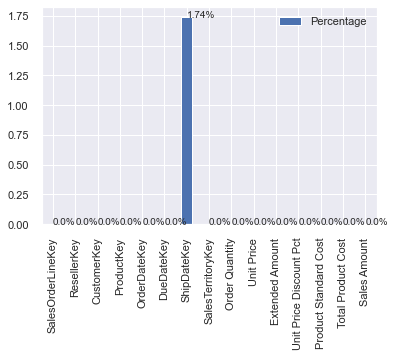

In [518]:
bar_chart = missing_df.plot.bar(y='Percentage')
for index, percent in enumerate(missing_percentage):
    bar_chart.text(index,percent, str(percent)+'%')

In [519]:
customer_data

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code
0,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable]
1,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700
2,11001,AW00011001,Eugene Huang,Seaford,Victoria,Australia,3198
3,11002,AW00011002,Ruben Torres,Hobart,Tasmania,Australia,7001
4,11003,AW00011003,Christy Zhu,North Ryde,New South Wales,Australia,2113
...,...,...,...,...,...,...,...
18480,29479,AW00029479,Tommy Tang,Versailles,Yveline,France,78000
18481,29480,AW00029480,Nina Raji,London,England,United Kingdom,SW19 3RU
18482,29481,AW00029481,Ivan Suri,Hof,Bayern,Germany,95010
18483,29482,AW00029482,Clayton Zhang,Saint Ouen,Charente-Maritime,France,17490


In [520]:
customer_data.shape

(18485, 7)

In [521]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485 entries, 0 to 18484
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18485 non-null  int64 
 1   Customer ID     18485 non-null  object
 2   Customer        18485 non-null  object
 3   City            18485 non-null  object
 4   State-Province  18485 non-null  object
 5   Country-Region  18485 non-null  object
 6   Postal Code     18485 non-null  object
dtypes: int64(1), object(6)
memory usage: 1011.0+ KB


In [522]:
customer_data.isnull().sum()

CustomerKey       0
Customer ID       0
Customer          0
City              0
State-Province    0
Country-Region    0
Postal Code       0
dtype: int64

In [523]:
customer_data.describe()

,CustomerKey
count,18485.000000
mean,20240.404923
std,5337.947953
min,-1.000000
25%,15620.000000
50%,20241.000000
75%,24862.000000
max,29483.000000


In [524]:
customer_data = customer_data[customer_data.CustomerKey > 0]
customer_data

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code
1,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700
2,11001,AW00011001,Eugene Huang,Seaford,Victoria,Australia,3198
3,11002,AW00011002,Ruben Torres,Hobart,Tasmania,Australia,7001
4,11003,AW00011003,Christy Zhu,North Ryde,New South Wales,Australia,2113
5,11004,AW00011004,Elizabeth Johnson,Wollongong,New South Wales,Australia,2500
...,...,...,...,...,...,...,...
18480,29479,AW00029479,Tommy Tang,Versailles,Yveline,France,78000
18481,29480,AW00029480,Nina Raji,London,England,United Kingdom,SW19 3RU
18482,29481,AW00029481,Ivan Suri,Hof,Bayern,Germany,95010
18483,29482,AW00029482,Clayton Zhang,Saint Ouen,Charente-Maritime,France,17490


In [525]:
object_cols = ['City', 'State-Province', 'Country-Region']

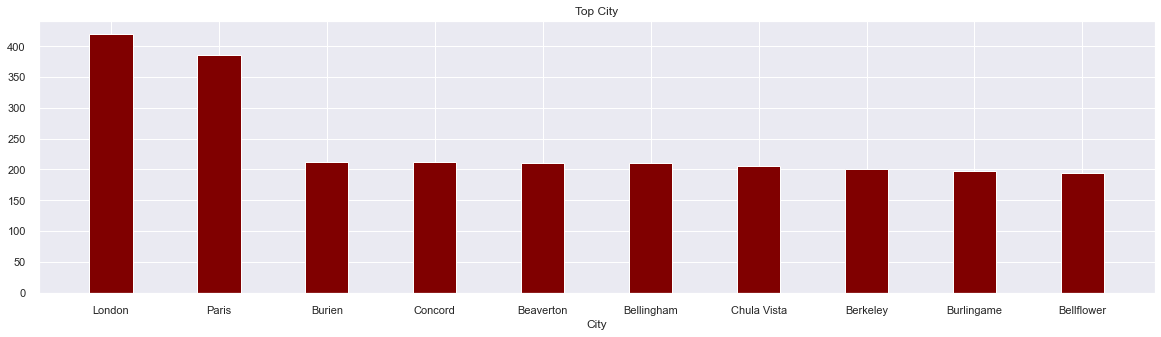

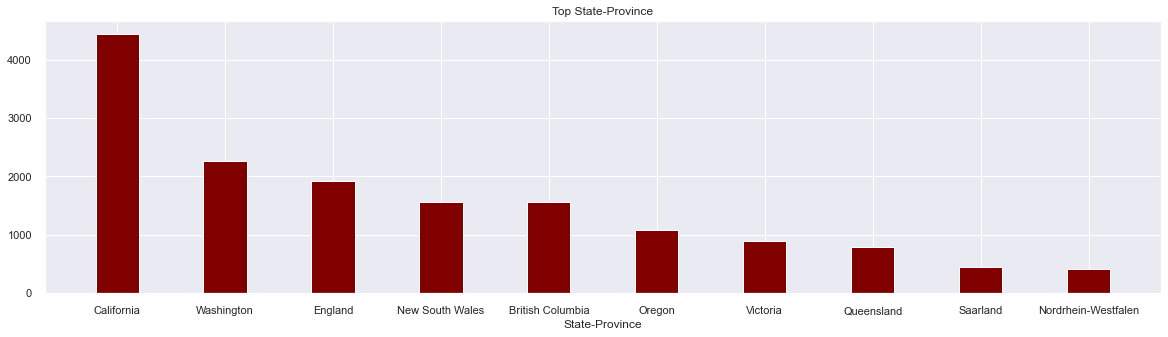

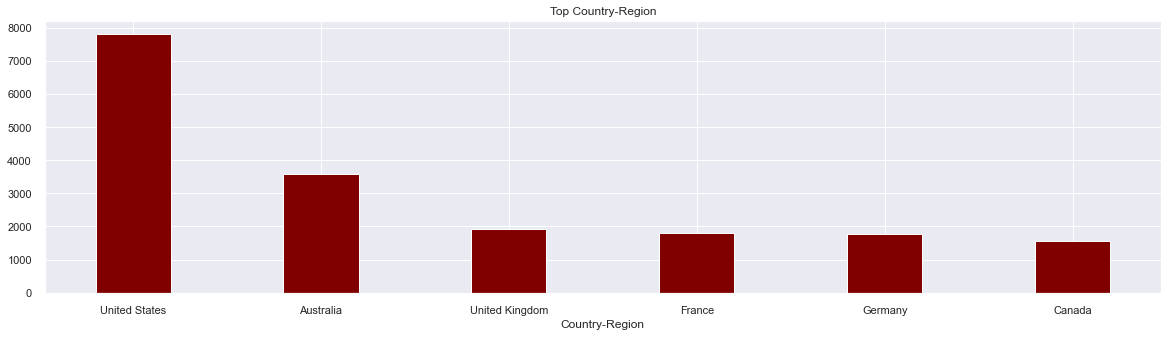

In [526]:
for col in object_cols:
    col_data = customer_data.groupby(col).agg({'CustomerKey': 'count'})
    fig = plt.figure(figsize = (20, 5))
    col_data = col_data.sort_values(by = 'CustomerKey', ascending = False)
    col_data = col_data.head(10)
    # creating the bar plot
    plt.bar(col_data.index, col_data.CustomerKey, color ='maroon',
        width = 0.4)

    plt.xlabel(col)
    plt.title("Top "+col)
    plt.show()

Pre-processing

In [527]:
sales_df = sales_data[['SalesOrderLineKey','CustomerKey','ProductKey','OrderDateKey','Sales Amount']]
sales_df

,SalesOrderLineKey,CustomerKey,ProductKey,OrderDateKey,Sales Amount
0,43659001,-1,349,20170702,2024.994
1,43659002,-1,350,20170702,6074.982
2,43659003,-1,351,20170702,2024.994
3,43659004,-1,344,20170702,2039.994
4,43659005,-1,345,20170702,2039.994
...,...,...,...,...,...
121248,75122001,15868,485,20200615,21.980
121249,75122002,15868,225,20200615,8.990
121250,75123001,18759,485,20200615,21.980
121251,75123002,18759,486,20200615,159.000


In [528]:
sales_df = sales_df[sales_df.CustomerKey > 0]
sales_df

,SalesOrderLineKey,CustomerKey,ProductKey,OrderDateKey,Sales Amount
60855,43697001,21768,310,20170701,3578.2700
60856,43698001,28389,346,20170701,3399.9900
60857,43699001,25863,346,20170701,3399.9900
60858,43700001,14501,336,20170701,699.0982
60859,43701001,11003,346,20170701,3399.9900
...,...,...,...,...,...
121248,75122001,15868,485,20200615,21.9800
121249,75122002,15868,225,20200615,8.9900
121250,75123001,18759,485,20200615,21.9800
121251,75123002,18759,486,20200615,159.0000


In [529]:
sales_df['Sales Amount'] = round(sales_df['Sales Amount'], 2)
sales_df.OrderDateKey = pd.to_datetime(sales_df['OrderDateKey'],format='%Y%m%d')
sales_df = sales_df[sales_df['Sales Amount'] > 0]

C:\Users\duann\AppData\Local\Temp\ipykernel_14652\2043643669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Sales Amount'] = round(sales_df['Sales Amount'], 2)
C:\Users\duann\AppData\Local\Temp\ipykernel_14652\2043643669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df.OrderDateKey = pd.to_datetime(sales_df['OrderDateKey'],format='%Y%m%d')


In [530]:
sales_df['SalesOrderKey'] = sales_df.SalesOrderLineKey.apply(lambda x: 'SO' + str(x//1000))
sales_df.head()

,SalesOrderLineKey,CustomerKey,ProductKey,OrderDateKey,Sales Amount,SalesOrderKey
60855,43697001,21768,310,2017-07-01,3578.27,SO43697
60856,43698001,28389,346,2017-07-01,3399.99,SO43698
60857,43699001,25863,346,2017-07-01,3399.99,SO43699
60858,43700001,14501,336,2017-07-01,699.10,SO43700
60859,43701001,11003,346,2017-07-01,3399.99,SO43701


In [531]:
sales_df['Sales Amount'] = round(sales_df['Sales Amount'], 2)

In [532]:
sales_df.shape

(60398, 6)

In [533]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 60855 to 121252
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SalesOrderLineKey  60398 non-null  int64         
 1   CustomerKey        60398 non-null  int64         
 2   ProductKey         60398 non-null  int64         
 3   OrderDateKey       60398 non-null  datetime64[ns]
 4   Sales Amount       60398 non-null  float64       
 5   SalesOrderKey      60398 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.2+ MB


In [534]:
print(sales_df.median())

SalesOrderLineKey    62104002.50
CustomerKey             18143.00
ProductKey                479.00
Sales Amount               29.99
dtype: float64


C:\Users\duann\AppData\Local\Temp\ipykernel_14652\1191633998.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(sales_df.median())
C:\Users\duann\AppData\Local\Temp\ipykernel_14652\1191633998.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sales_df.median())


In [535]:
sales_df.describe()

,SalesOrderLineKey,CustomerKey,ProductKey,Sales Amount
count,6.039800e+04,60398.000000,60398.000000,60398.000000
mean,6.184938e+07,18841.685420,437.557932,486.086922
std,8.030547e+06,5432.430404,118.088390,928.489878
min,4.369700e+07,11000.000000,214.000000,2.290000
25%,5.556000e+07,14003.000000,359.000000,7.950000
50%,6.210400e+07,18143.000000,479.000000,29.990000
75%,6.865000e+07,23429.750000,529.000000,539.990000
max,7.512300e+07,29483.000000,606.000000,3578.270000


Get SalesOrder

In [536]:
sales_df['SalesOrder'] = sales_df.SalesOrderLineKey.apply(lambda x: 'SO' + str(x//1000))
sales_df[['SalesOrderLineKey','CustomerKey','SalesOrder']]


,SalesOrderLineKey,CustomerKey,SalesOrder
60855,43697001,21768,SO43697
60856,43698001,28389,SO43698
60857,43699001,25863,SO43699
60858,43700001,14501,SO43700
60859,43701001,11003,SO43701
...,...,...,...
121248,75122001,15868,SO75122
121249,75122002,15868,SO75122
121250,75123001,18759,SO75123
121251,75123002,18759,SO75123


In [537]:
sales_df.OrderDateKey = sales_df.OrderDateKey.apply(pd.to_datetime)
sales_df[['CustomerKey','OrderDateKey','SalesOrderLineKey']]


,CustomerKey,OrderDateKey,SalesOrderLineKey
60855,21768,2017-07-01,43697001
60856,28389,2017-07-01,43698001
60857,25863,2017-07-01,43699001
60858,14501,2017-07-01,43700001
60859,11003,2017-07-01,43701001
...,...,...,...
121248,15868,2020-06-15,75122001
121249,15868,2020-06-15,75122002
121250,18759,2020-06-15,75123001
121251,18759,2020-06-15,75123002


In [538]:
FM = sales_df.groupby('CustomerKey').agg({'SalesOrderKey':'nunique','Sales Amount':lambda x:x.sum()})

In [539]:
FM.columns = ['Frequency', 'Monetary_Value']
FM

,Frequency,Monetary_Value
CustomerKey,,
11000,3,8248.99
11001,3,6383.88
11002,3,8114.04
11003,3,8139.29
11004,3,8196.01
...,...,...
29479,1,2049.10
29480,1,2442.03
29481,1,3374.99


In [540]:
customer_rfm = sales_df.groupby(['CustomerKey'],as_index=False)['OrderDateKey'].max()
customer_rfm.columns = ['CustomerKey','LastOrderDate']
customer_rfm['Recency'] = customer_rfm['LastOrderDate'].apply(lambda x: (customer_rfm.LastOrderDate.max() - x).days)
customer_rfm


,CustomerKey,LastOrderDate,Recency
0,11000,2019-10-04,255
1,11001,2020-05-12,34
2,11002,2019-07-27,324
3,11003,2019-10-11,248
4,11004,2019-10-02,257
...,...,...,...
18479,29479,2019-02-05,496
18480,29480,2019-12-18,180
18481,29481,2018-01-13,884
18482,29482,2019-02-19,482


In [541]:
customer_rfm = customer_rfm.merge(FM,left_on='CustomerKey',right_on='CustomerKey')
customer_rfm

,CustomerKey,LastOrderDate,Recency,Frequency,Monetary_Value
0,11000,2019-10-04,255,3,8248.99
1,11001,2020-05-12,34,3,6383.88
2,11002,2019-07-27,324,3,8114.04
3,11003,2019-10-11,248,3,8139.29
4,11004,2019-10-02,257,3,8196.01
...,...,...,...,...,...
18479,29479,2019-02-05,496,1,2049.10
18480,29480,2019-12-18,180,1,2442.03
18481,29481,2018-01-13,884,1,3374.99
18482,29482,2019-02-19,482,1,2049.10


In [542]:
customer_rfm.drop('LastOrderDate', inplace=True, axis=1)

In [543]:
customer_rfm.describe()

,CustomerKey,Recency,Frequency,Monetary_Value
count,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,174.667983,1.496375,1588.329252
std,5336.015523,145.644062,1.101139,2124.231713
min,11000.000000,0.000000,1.000000,2.290000
25%,15620.750000,71.000000,1.000000,49.970000
50%,20241.500000,153.000000,1.000000,270.265000
75%,24862.250000,248.000000,2.000000,2511.275000
max,29483.000000,1080.000000,28.000000,13295.380000


Visualize

Histogram

c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

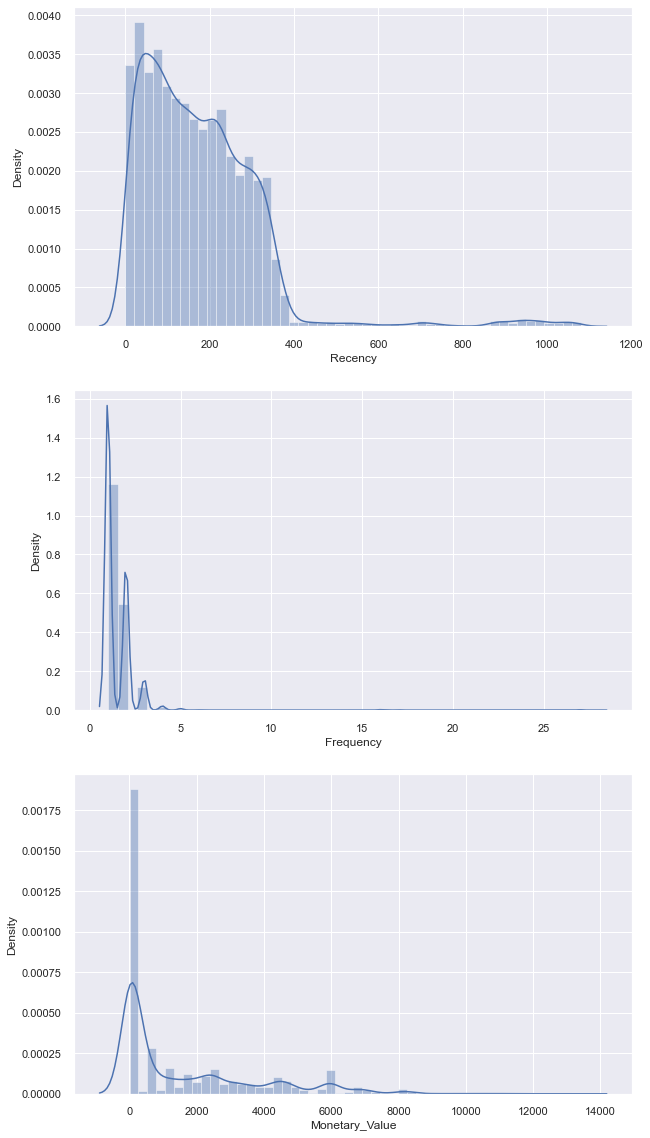

In [544]:
fig, ax = plt.subplots(3,1, figsize=(10,20))
sns.distplot(customer_rfm['Recency'], ax = ax[0])
sns.distplot(customer_rfm['Frequency'], ax = ax[1])
sns.distplot(customer_rfm['Monetary_Value'], ax = ax[2])
plt.show()


Boxplot

<AxesSubplot:ylabel='Monetary_Value'>

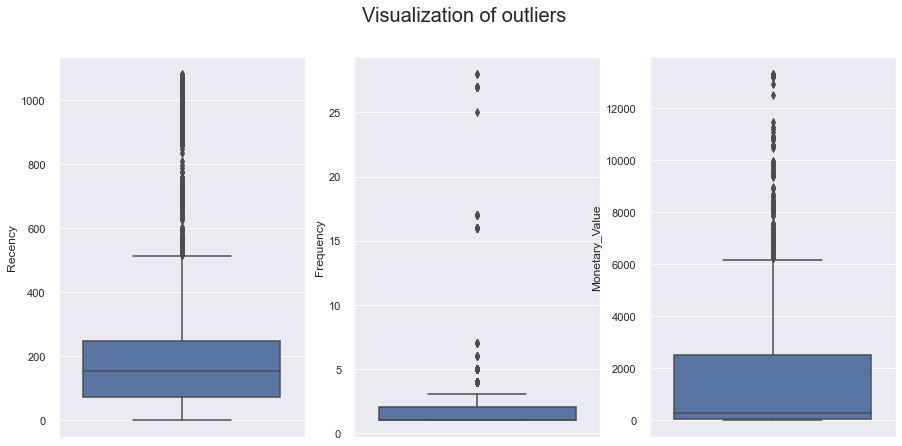

In [545]:
fig = plt.figure(figsize = (15,7))
fig.suptitle("Visualization of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=customer_rfm,y="Recency")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=customer_rfm,y="Frequency")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=customer_rfm,y="Monetary_Value")


Heatmap

<AxesSubplot:>

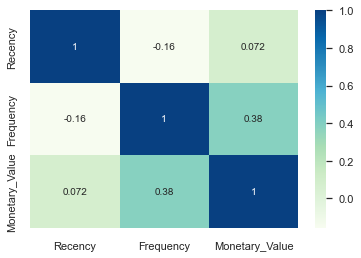

In [546]:
correlation = customer_rfm[['Recency','Frequency','Monetary_Value']].corr()
sns.heatmap(correlation, cmap='GnBu', annot= True)


Scatter Plot

Pairplot

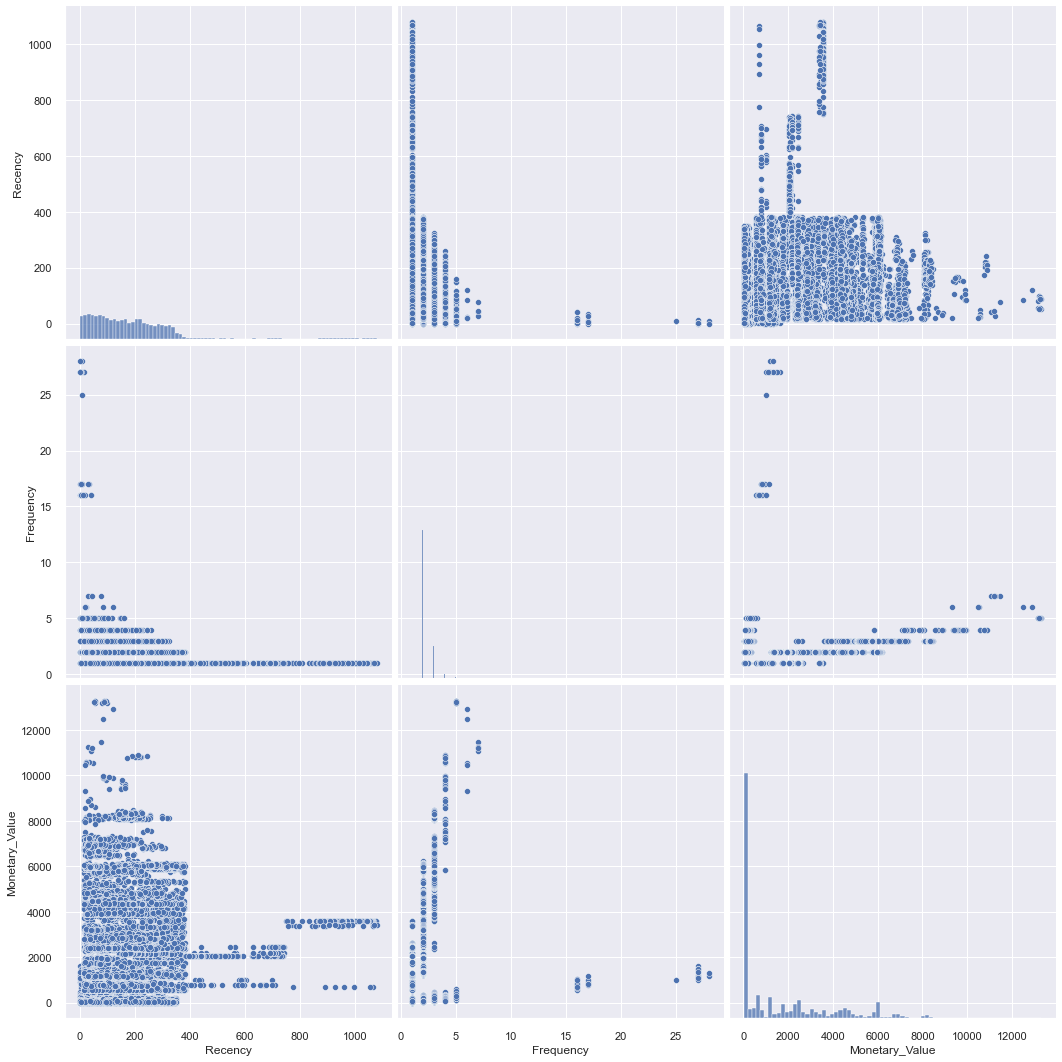

In [547]:
sns.pairplot(customer_rfm[['Recency','Frequency','Monetary_Value']], height=5)

# RFM

In [548]:
quantiles = customer_rfm.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5
    
def RScore(x,p,d):
    if x >= d[p][0.8]:
        return 1
    elif x >= d[p][0.6]:
        return 2
    elif x >= d[p][0.4]: 
        return 3
    elif x >= d[p][0.2]:
        return 4
    else:
        return 5

customer_rfm['RS'] = customer_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
customer_rfm['FS'] = customer_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
customer_rfm['MS'] = customer_rfm['Monetary_Value'].apply(FMScore, args=('Monetary_Value',quantiles,))

def join_rfm(x): return str(int(x['RS'])) + str(int(x['FS'])) + str(int(x['MS']))
customer_rfm['RFM_Segment'] = customer_rfm.apply(join_rfm, axis=1)

In [549]:
customer_rfm.head(10)

,CustomerKey,Recency,Frequency,Monetary_Value,RS,FS,MS,RFM_Segment
0,11000,255,3,8248.99,2,5,5,255
1,11001,34,3,6383.88,5,5,5,555
2,11002,324,3,8114.04,1,5,5,155
3,11003,248,3,8139.29,2,5,5,255
4,11004,257,3,8196.01,2,5,5,255
5,11005,256,3,8121.33,2,5,5,255
6,11006,244,3,8119.03,2,5,5,255
7,11007,300,3,8211.00,1,5,5,155
8,11008,317,3,8106.31,1,5,5,155
9,11009,249,3,8091.33,2,5,5,255


In [550]:
# Create human friendly RFM labels
segt_map = {
    r'1[1-5]1':'Lost',
    r'112':'Lost',
    r'3[2-3]2': 'Hibernating',
    r'2[3-5]1': 'Hibernating',
    r'2[2-3][2-3]': 'Hibernating',
    r'1[2-3]2': 'Hibernating',
    r'123': 'Hibernating',
    r'211': 'Hibernating',
    r'212': 'Hibernating',
    r'2[4-5][2-5]': 'At risk',
    r'2[2-3][4-5]': 'At risk',
    r'15[2-3]': 'At risk',
    r'14[2-5]': 'At risk',
    r'13[3-5]': 'At risk',
    r'12[4-5]': 'At risk',
    r'15[4-5]': 'Can\'t loose them',
    r'[1-2]1[4-5]': 'Can\'t loose them',
    r'113': 'Can\'t loose them',
    r'221': 'About to sleep',
    r'213': 'About to sleep',
    r'3[2-3]1': 'About to sleep',
    r'312': 'About to sleep',
    r'53[4-5]': 'Need attention',
    r'[3-4]43': 'Need attention',
    r'[3-4]34': 'Need attention',
    r'32[4-5]': 'Need attention',
    r'543': 'Loyal customers',
    r'444': 'Loyal customers',
    r'[3-4]35': 'Loyal customers',
    r'3[4-5][4-5]': 'Loyal customers',
    r'543': 'Loyal customers',
    r'52[1-5]': 'Promising',
    r'51[3-5]': 'Promising',
    r'42[4-5]': 'Promising',
    r'[3-4]1[3-5]': 'Promising',
    r'51[1-2]': 'New customers',
    r'4[1-2][1-2]': 'New customers',
    r'311': 'New customers',
    r'[3-5]5[1-3]': 'Potential loyalists',
    r'[4-5]4[1-2]': 'Potential loyalists',
    r'[4-5]3[1-3]': 'Potential loyalists',
    r'423': 'Potential loyalists',
    r'3[23]3': 'Potential loyalists',
    r'34[1-2]': 'Potential loyalists',
    r'5[4-5][4-5]': 'Champions',
    r'4[4-5]5': 'Champions',
    r'454': 'Champions',
}

customer_rfm['Customer_Segment'] = customer_rfm['RS'].map(str) + customer_rfm['FS'].map(str)+ customer_rfm['MS'].map(str)
customer_rfm['Customer_Segment'] = customer_rfm['Customer_Segment'].replace(segt_map, regex=True)
customer_rfm

,CustomerKey,Recency,Frequency,Monetary_Value,RS,FS,MS,RFM_Segment,Customer_Segment
0,11000,255,3,8248.99,2,5,5,255,At risk
1,11001,34,3,6383.88,5,5,5,555,Champions
2,11002,324,3,8114.04,1,5,5,155,Can't loose them
3,11003,248,3,8139.29,2,5,5,255,At risk
4,11004,257,3,8196.01,2,5,5,255,At risk
...,...,...,...,...,...,...,...,...,...
18479,29479,496,1,2049.10,1,1,4,114,Can't loose them
18480,29480,180,1,2442.03,3,1,4,314,Promising
18481,29481,884,1,3374.99,1,1,5,115,Can't loose them
18482,29482,482,1,2049.10,1,1,4,114,Can't loose them


In [551]:
customer_segment = customer_rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary_Value': ['mean', 'count'] }).round(1)
customer_segment


Recency Frequency Monetary_Value      
                       mean      mean           mean count
Customer_Segment                                          
About to sleep        193.2       1.0          312.0  1116
At risk               263.2       2.1         3758.6  2090
Can't loose them      421.6       1.0         1846.5  1828
Champions              58.4       2.5         4915.5  1678
Hibernating           230.3       1.0           40.9  1474
Lost                  310.8       1.0           40.5  1462
Loyal customers       119.0       2.2         3452.8  1793
Need attention        115.7       2.0          139.8   292
New customers          80.6       1.0           35.9  3209
Potential loyalists    68.6       3.0          134.5   976
Promising              88.8       1.0         1143.3  2566

In [552]:
customer_segment.columns = ['Mean_R','Mean_F','Mean_M','Count']
customer_segment = customer_segment.sort_values(by= 'Count')

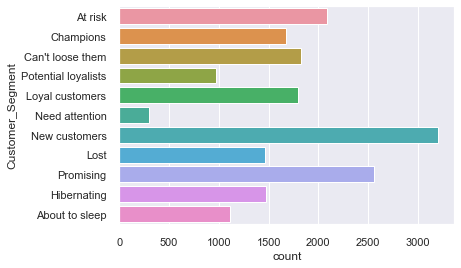

In [553]:
sns.set(style="darkgrid",rc={'figure.figsize':(6,4)})
ax=sns.countplot(y="Customer_Segment",data=customer_rfm )
# ax.title('Number of customers in segments')

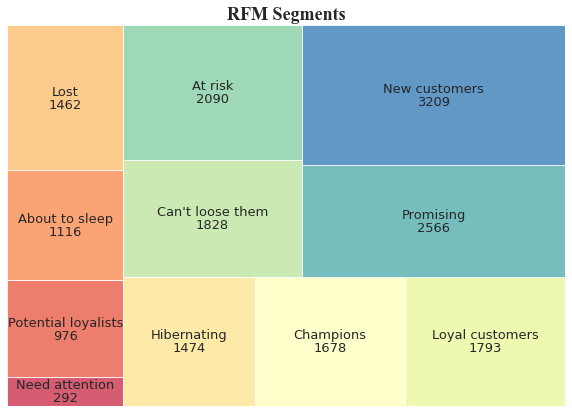

In [554]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 7)
squarify.plot(sizes=customer_segment.Count, 
              label=customer_segment.index,
              value=customer_segment.Count,
              alpha=0.8,
              text_kwargs={'fontsize': 13, 'fontfamily': 'sans-ser'},
              color=sns.color_palette("Spectral", len(customer_segment.index)))
plt.title("RFM Segments",fontsize=18,fontweight="bold",fontfamily='Times New Roman')
plt.axis('off')
plt.show()


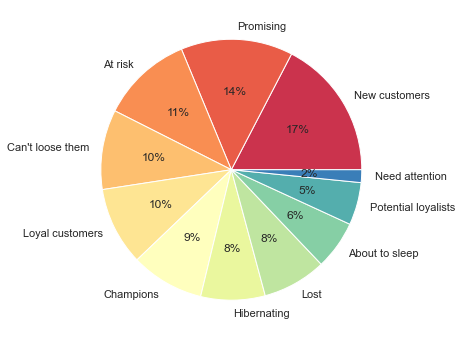

In [555]:
plt.figure(figsize = (6,6))
plt.pie(customer_rfm.Customer_Segment.value_counts(),
        labels=customer_rfm.Customer_Segment.value_counts().index,
        autopct='%.0f%%',
        colors=sns.color_palette("Spectral", len(customer_segment.index)))
plt.show()

Export File csv

In [556]:
customer_rfm

,CustomerKey,Recency,Frequency,Monetary_Value,RS,FS,MS,RFM_Segment,Customer_Segment
0,11000,255,3,8248.99,2,5,5,255,At risk
1,11001,34,3,6383.88,5,5,5,555,Champions
2,11002,324,3,8114.04,1,5,5,155,Can't loose them
3,11003,248,3,8139.29,2,5,5,255,At risk
4,11004,257,3,8196.01,2,5,5,255,At risk
...,...,...,...,...,...,...,...,...,...
18479,29479,496,1,2049.10,1,1,4,114,Can't loose them
18480,29480,180,1,2442.03,3,1,4,314,Promising
18481,29481,884,1,3374.99,1,1,5,115,Can't loose them
18482,29482,482,1,2049.10,1,1,4,114,Can't loose them


In [557]:
customer_rfm.to_csv('RFM_PreProcessing_Group11_221PP0801_FinalProjcet.csv', index=False, header=True)

Feature Engineering for KMeans

Test: Transformation Data
<Dữ liệu lệch phải>:
* Root ⁿ√x
* Logarithm log(x)
* Reciprocal 1/x
* Box-Cox Transformation
* Yeo-Johnson Transformation

In [558]:
rfm = customer_rfm[['CustomerKey','Recency','Frequency','Monetary_Value']]
rfm


,CustomerKey,Recency,Frequency,Monetary_Value
0,11000,255,3,8248.99
1,11001,34,3,6383.88
2,11002,324,3,8114.04
3,11003,248,3,8139.29
4,11004,257,3,8196.01
...,...,...,...,...
18479,29479,496,1,2049.10
18480,29480,180,1,2442.03
18481,29481,884,1,3374.99
18482,29482,482,1,2049.10


In [559]:
rfm.Recency = rfm.Recency.apply(lambda x: x+1)

C:\Users\duann\AppData\Local\Temp\ipykernel_14652\278035558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm.Recency = rfm.Recency.apply(lambda x: x+1)


In [560]:
rfm

,CustomerKey,Recency,Frequency,Monetary_Value
0,11000,256,3,8248.99
1,11001,35,3,6383.88
2,11002,325,3,8114.04
3,11003,249,3,8139.29
4,11004,258,3,8196.01
...,...,...,...,...
18479,29479,497,1,2049.10
18480,29480,181,1,2442.03
18481,29481,885,1,3374.99
18482,29482,483,1,2049.10


In [561]:
def analyze_skewness(x):
    fig, ax = plt.subplots(3, 2, figsize=(10,10))
    sns.distplot(rfm[x], ax=ax[0,0])
    sns.distplot(np.log(rfm[x]), ax=ax[0,1])
    sns.distplot(np.reciprocal(rfm[x]), ax=ax[1,0])
    sns.distplot(np.sqrt(rfm[x]), ax=ax[1,1])
    sns.distplot(stats.yeojohnson(rfm[x])[0], ax=ax[2,0])
    sns.distplot(stats.boxcox(rfm[x])[0], ax=ax[2,1])
    plt.tight_layout()
    plt.show()
    
    print(rfm[x].skew().round(2))
    print(np.log(rfm[x]).skew().round(2))
    print(np.sqrt(rfm[x]).skew().round(2))
    print(np.reciprocal(rfm[x]).skew().round(2))
    print(pd.Series(stats.yeojohnson(rfm[x])[0]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm[x])[0]).skew().round(2))

c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

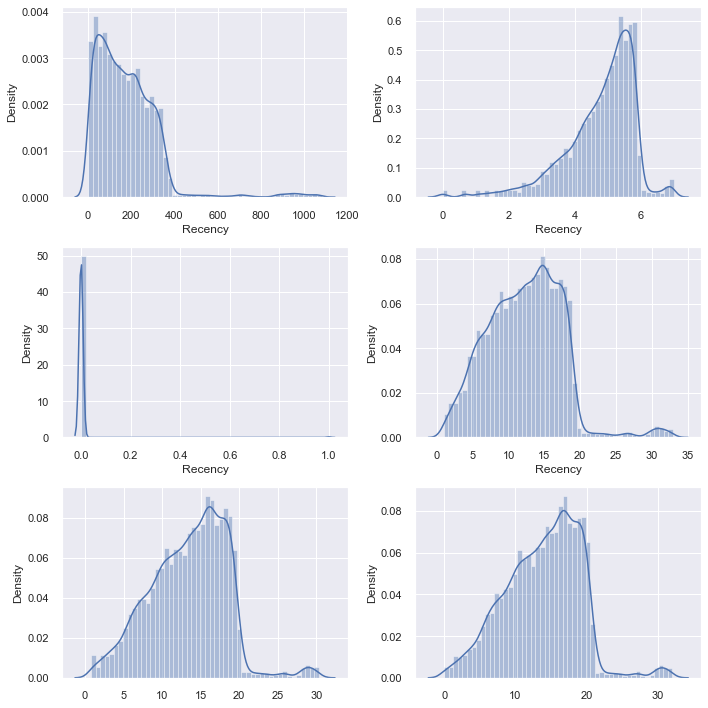

2.47
-1.29
0.46
17.04
-0.0
0.0


c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

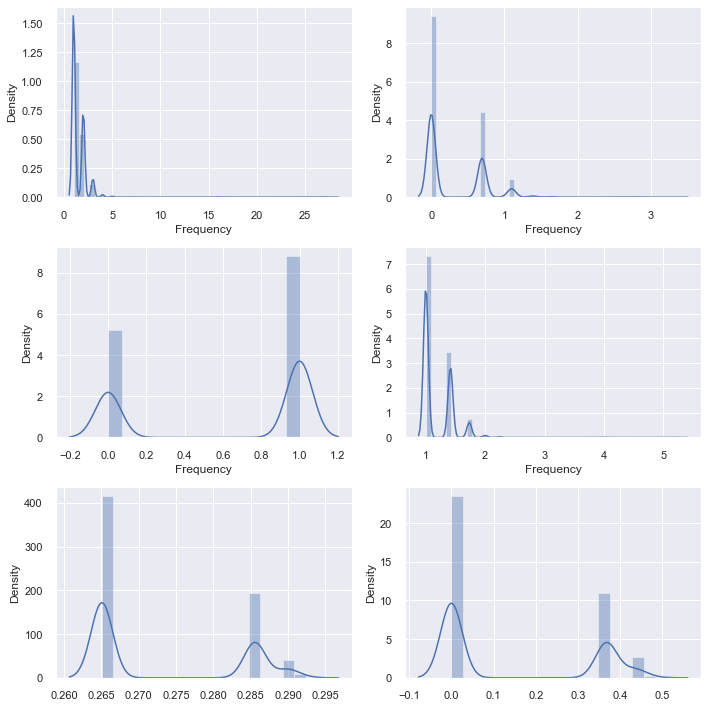

12.58
1.29
3.67
-0.53
0.57
0.56


c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\duann\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

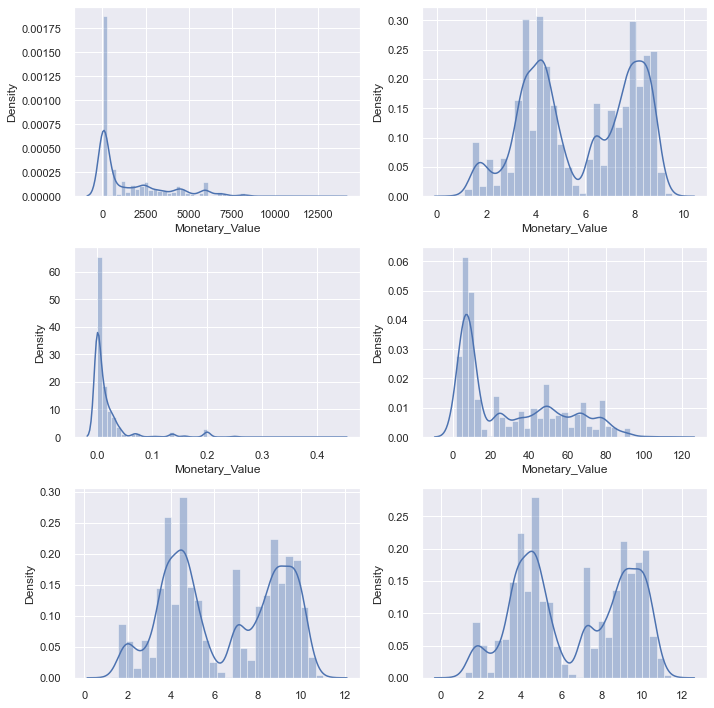

1.41
-0.12
0.68
3.71
-0.03
-0.04


In [562]:
analyze_skewness('Recency')
analyze_skewness('Frequency')
analyze_skewness('Monetary_Value')

In [563]:
rfm_final = pd.DataFrame()
rfm_final['Recency'] = stats.boxcox(rfm['Recency'])[0]
rfm_final['Frequency'] = stats.boxcox(rfm['Frequency'])[0]
rfm_final['Monetary'] = pd.Series(np.cbrt(rfm['Monetary_Value'])).values
rfm_final

,Recency,Frequency,Monetary
0,17.861626,0.433569,20.205375
1,7.257971,0.433569,18.550754
2,19.727012,0.433569,20.094585
3,17.655207,0.433569,20.115408
4,17.919941,0.433569,20.162026
...,...,...,...
18479,23.474497,0.000000,12.701482
18480,15.424041,0.000000,13.466363
18481,29.585055,0.000000,14.999985
18482,23.203883,0.000000,12.701482


In [564]:
std_scaler = StandardScaler()
df = rfm_final.copy()
std_scaler.fit(df)
df_scaled = std_scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [565]:
df_scaled

,Recency,Frequency,Monetary
0,0.756776,1.569374,2.025171
1,-1.247763,1.569374,1.732963
2,1.109412,1.569374,2.005605
3,0.717754,1.569374,2.009283
4,0.767800,1.569374,2.017515
...,...,...,...
18479,1.817845,-0.765189,0.699976
18480,0.295969,-0.765189,0.835055
18481,2.972999,-0.765189,1.105894
18482,1.766688,-0.765189,0.699976


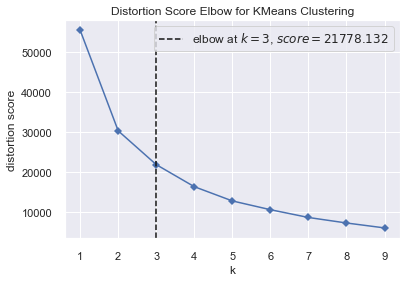

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [566]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= False)
visualizer.fit(df_scaled)        
visualizer.show()        

For n_clusters=2, the silhouette score is 0.4678934833259336
For n_clusters=3, the silhouette score is 0.41116892847515946
For n_clusters=4, the silhouette score is 0.43732134218313046
For n_clusters=5, the silhouette score is 0.45753835837068635
For n_clusters=6, the silhouette score is 0.4790905555202213
For n_clusters=7, the silhouette score is 0.46601656862643154
For n_clusters=8, the silhouette score is 0.47466621355683536
For n_clusters=9, the silhouette score is 0.48145110016012815


C:\Users\duann\AppData\Local\Temp\ipykernel_14652\3180706589.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_n_clusters,silhouette_avg,'bx-', color='blue')


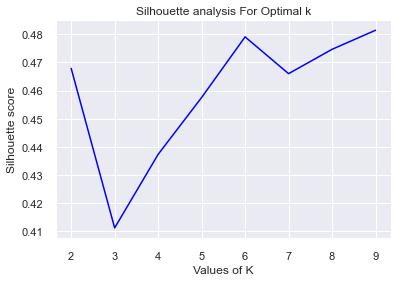

In [567]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_avg.append(score)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, score))
plt.plot(range_n_clusters,silhouette_avg,'bx-', color='blue')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

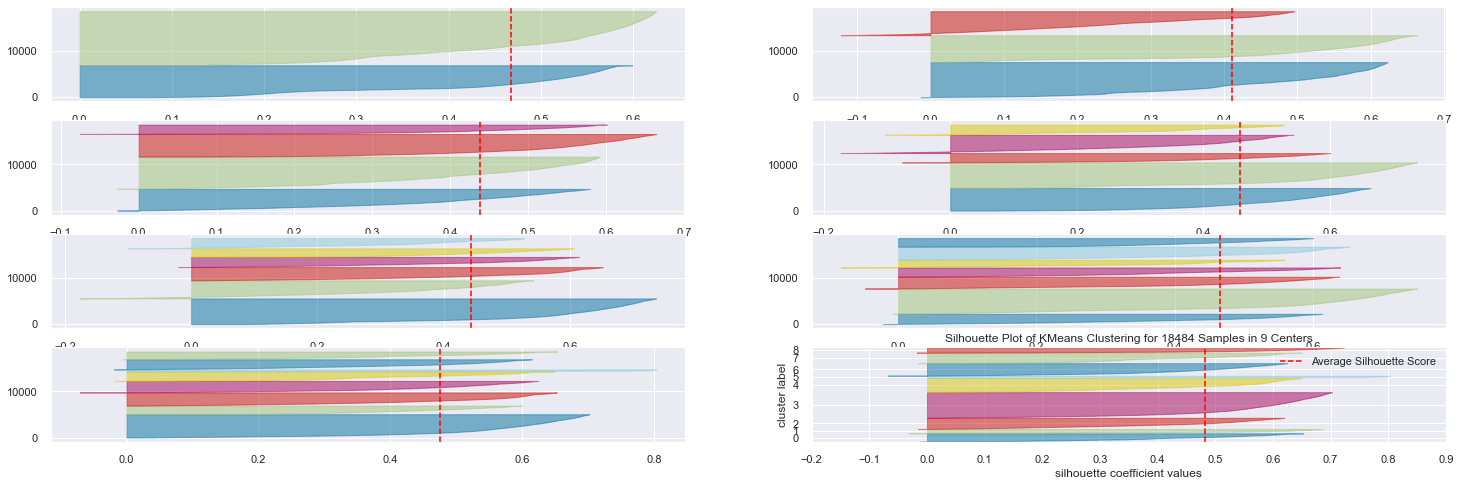

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 18484 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [578]:
#silhouette
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(25,8))
for k in [2, 3, 4, 5, 6, 7, 8, 9]:

    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

visualizer.show()

In [569]:
df_scaled

,Recency,Frequency,Monetary
0,0.756776,1.569374,2.025171
1,-1.247763,1.569374,1.732963
2,1.109412,1.569374,2.005605
3,0.717754,1.569374,2.009283
4,0.767800,1.569374,2.017515
...,...,...,...
18479,1.817845,-0.765189,0.699976
18480,0.295969,-0.765189,0.835055
18481,2.972999,-0.765189,1.105894
18482,1.766688,-0.765189,0.699976


In [570]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,Recency,Frequency,Monetary
0,0.733049,-0.745841,-0.443577
1,-0.030047,1.298070,1.041268
2,-1.056824,-0.369891,-0.526989


In [571]:
df_new = rfm.assign(Cluster = cluster_labels)

In [572]:
df_new

,CustomerKey,Recency,Frequency,Monetary_Value,Cluster
0,11000,256,3,8248.99,1
1,11001,35,3,6383.88,1
2,11002,325,3,8114.04,1
3,11003,249,3,8139.29,1
4,11004,258,3,8196.01,1
...,...,...,...,...,...
18479,29479,497,1,2049.10,0
18480,29480,181,1,2442.03,0
18481,29481,885,1,3374.99,0
18482,29482,483,1,2049.10,0


In [573]:
df_result = df_new.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary_Value': ['mean', 'count']
    }).round(2)
df_result

Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0        270.89      1.01         602.33  7575
1        157.73      2.36        3882.05  5795
2         54.95      1.24         449.66  5114

<AxesSubplot:xlabel='Cluster', ylabel='Monetary_Value'>

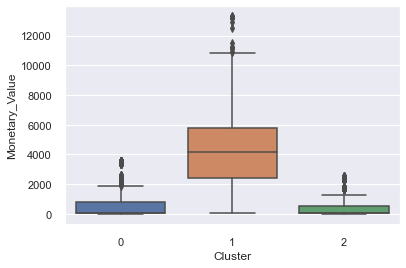

In [574]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster', y='Monetary_Value', data=df_new)

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

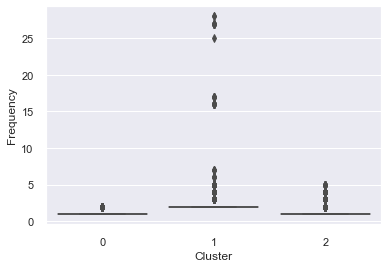

In [575]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster', y='Frequency', data=df_new)

<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

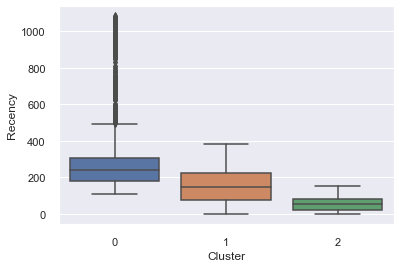

In [576]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster', y='Recency', data=df_new)

C:\Users\duann\AppData\Local\Temp\ipykernel_14652\998477384.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,


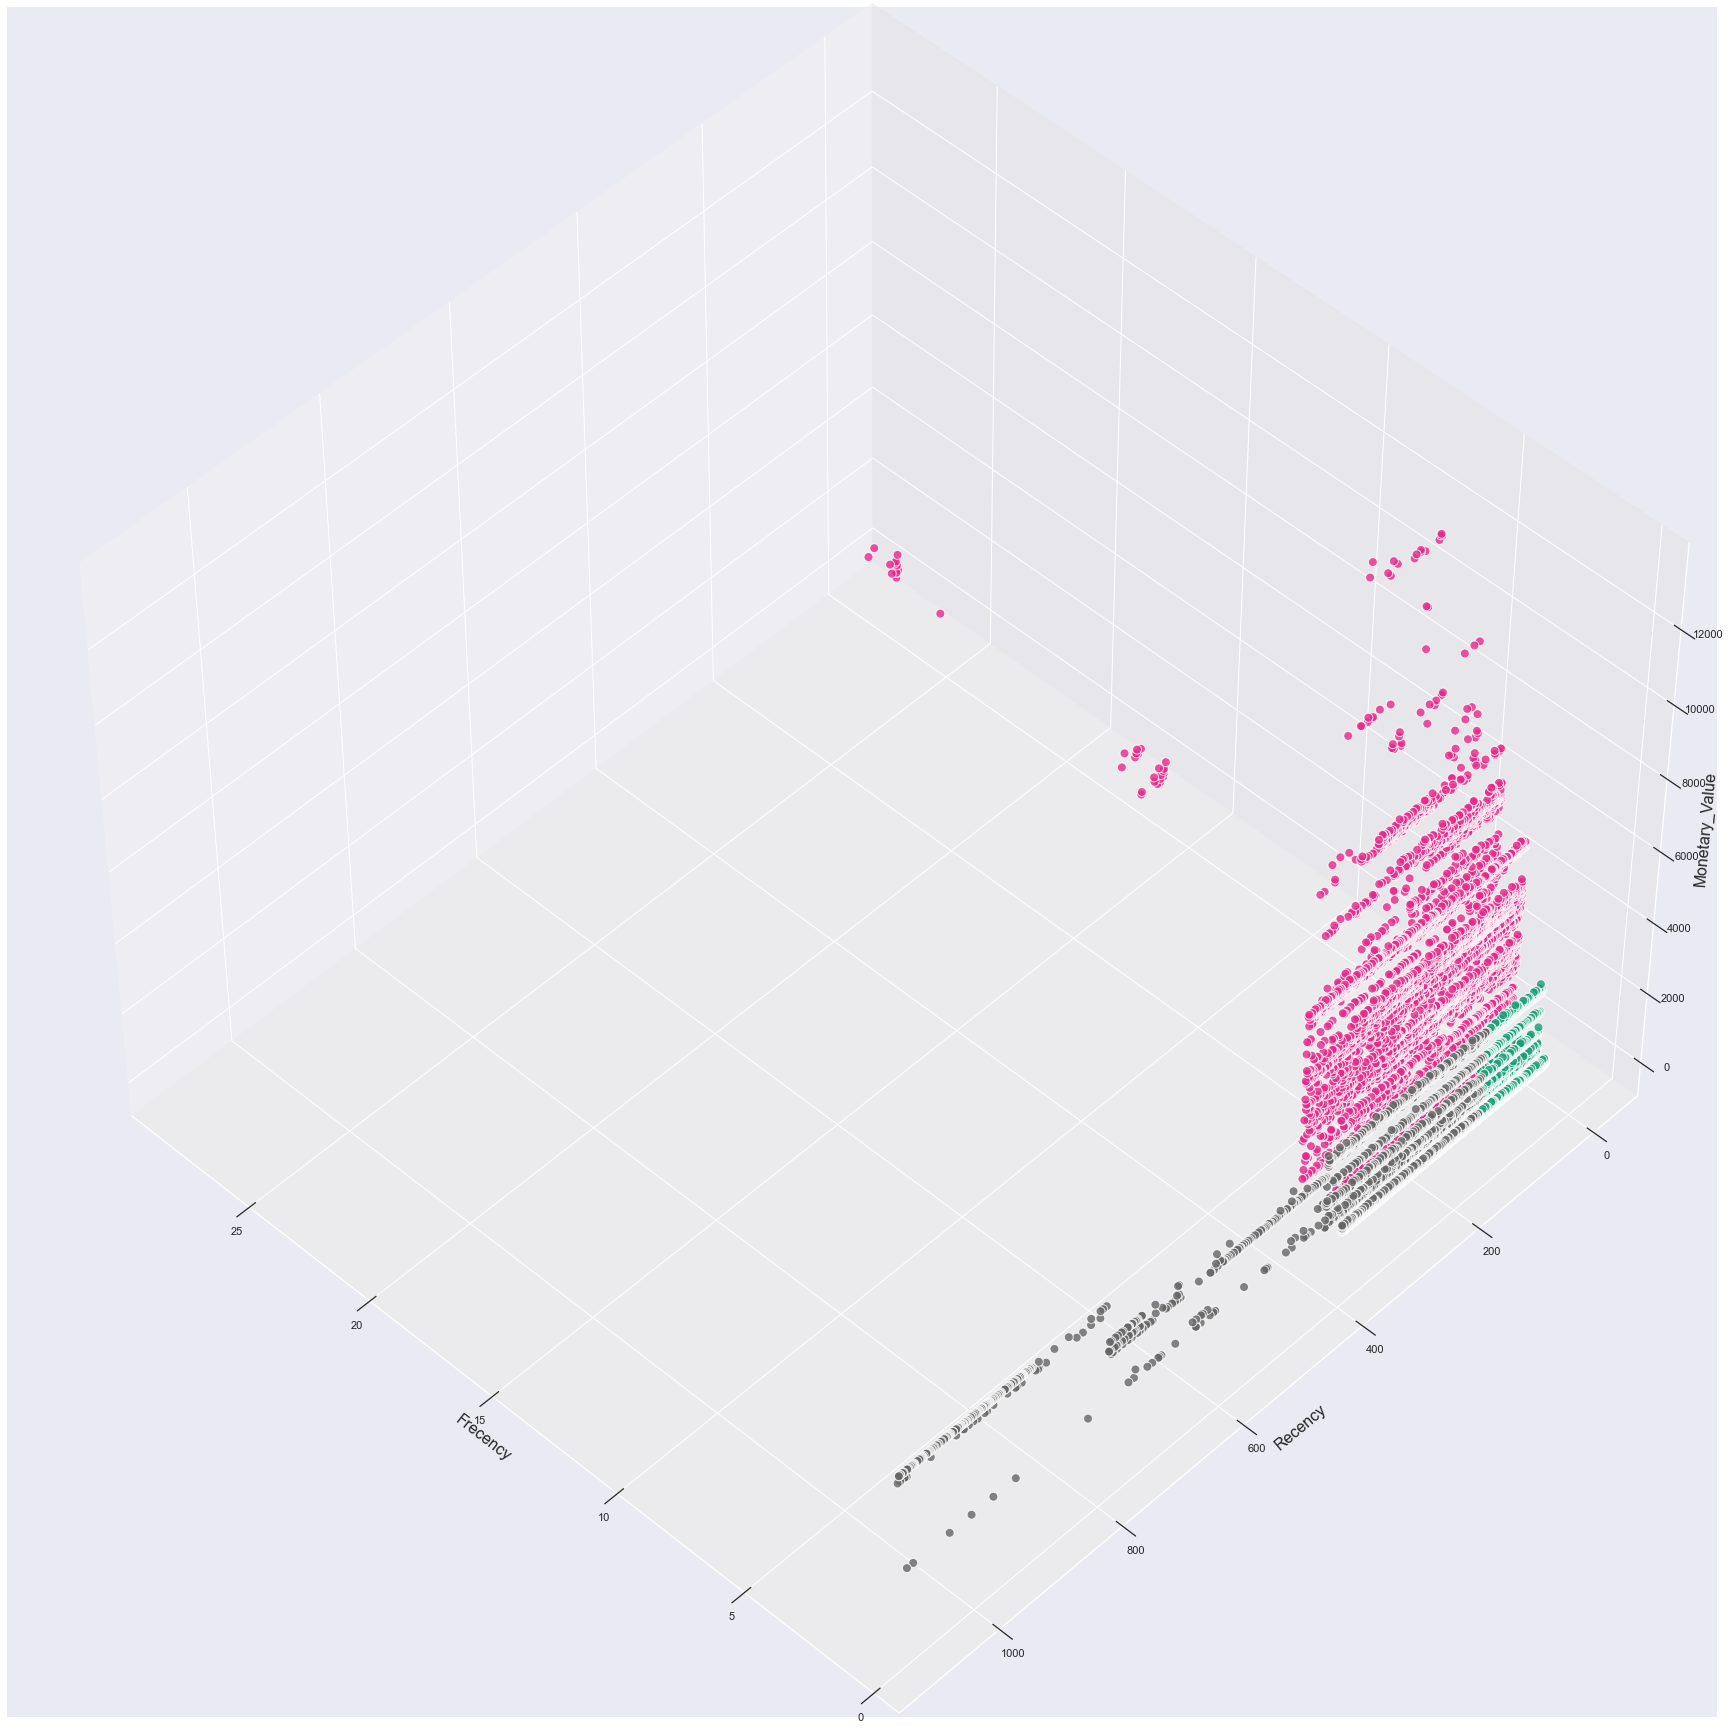

In [577]:
plt.rcParams['figure.figsize'] = (25,25)
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig,
            rect = [0, 0, .95, 1],
            elev = 48,
            azim = 134,)
plt.cla()
ax.scatter(df_new.Frequency, df_new.Recency, df_new.Monetary_Value,
            c = df_new.Cluster,
            s = 80,
            cmap = 'Dark2_r',
            alpha = 0.8,
            edgecolor = 'white')
ax.set_xlabel('Frecency', fontsize = 16)
ax.set_ylabel('Recency', fontsize = 16)
ax.set_zlabel('Monetary_Value', fontsize = 16)
plt.show()